<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day2/SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



# 2.Envs

In [2]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8126251002329562222
]


In [3]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.6.0
Keras version: 2.6.0


In [4]:
!python -V
platform.python_version()

Python 3.7.11


'3.7.11'

In [5]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Task1: multi-class classification with sklearn dataset - digits  
Logistic Regression model

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Load dataset

In [8]:
digits = datasets.load_digits()#导入digits数据集

In [9]:
digits.keys()#查看digits中有哪些属性

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [10]:
digits.data.shape

(1797, 64)

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## view raw images

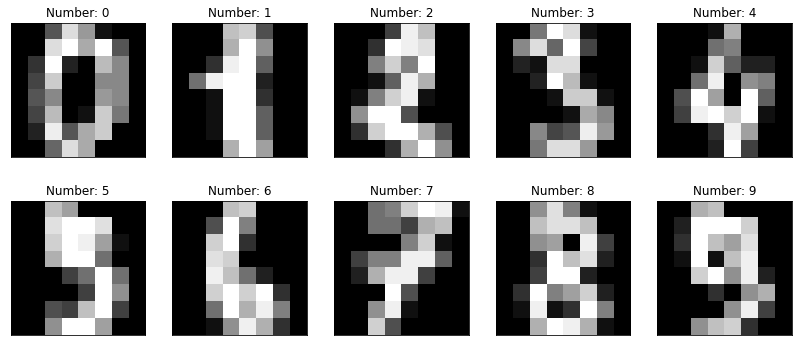

In [12]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits.images[i], cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), digits.target[i] ),color = 'black')
plt.show()

In [13]:
x = digits.data   ##获得数据集中的输入
y = digits.target ##获得数据集中的输出，即标签(也就是类别)

## data splitting(8:2)

In [14]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## GRID SEARCH to find the best model and parameters

In [15]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [ 1 ], 'kernel': ['linear']},
  {'C': [ 1, 4, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
]

In [16]:
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1], 'kernel': ['linear']},
                         {'C': [1, 4, 10], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9909601238869532
Best `C`: 4
Best kernel: rbf
Best `gamma`: 0.001


## Training

In [18]:
svm1 = SVC(
            gamma = 0.001,
            kernel = 'rbf',
            C = 4,
            decision_function_shape = 'ovr',
            verbose = 1
            )
svm1.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

## Predict

In [19]:
y_pred = svm1.predict(x_test)

### Accuracy

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy score: ', accuracy_score(y_test, y_pred).round(3))

accuracy score:  0.992


### Confusion Matrix

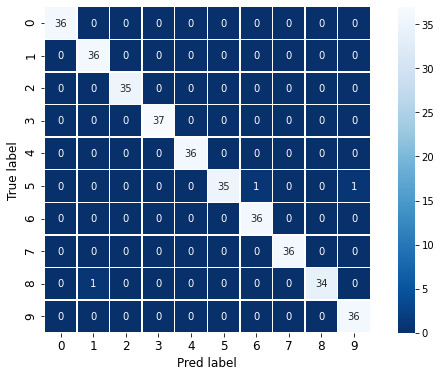

In [21]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      0.95      0.97        37
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99        35
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Take a view - testing image (a few)

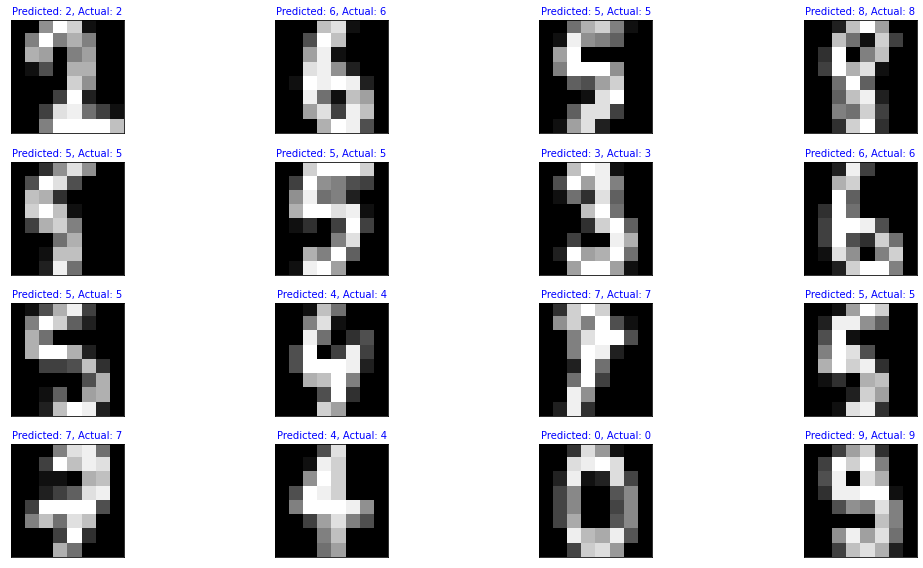

In [23]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 1*num_cols, 1*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (8, 8)), cmap='gray', interpolation=None)

    if y_pred[i] == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

Real:  5
Predict:  5


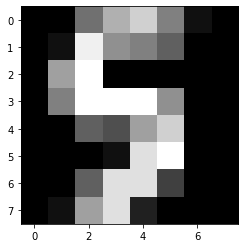

In [25]:
i = 2
plt.imshow(np.reshape( x_test[i], (8, 8)), cmap=plt.cm.gray)
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

In [26]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

3


[44, 232, 354]

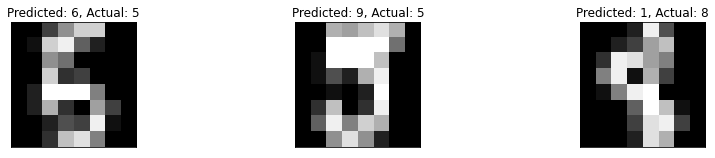

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 1*num_cols, 1*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (8, 8)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex],y_test[badIndex]), fontsize = 12)
plt.tight_layout()
plt.show()

---

# Task2: multi-class classification with Mnist

## Load dataset

In [28]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [29]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [30]:
mnist.data.shape

(70000, 784)

In [31]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## view raw images

In [32]:
mnist['data'][0].shape

(784,)

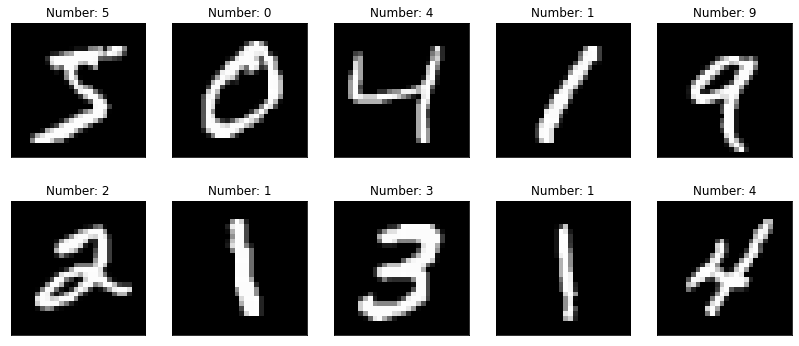

In [33]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mnist['data'][i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

In [34]:
x = mnist['data']
y = mnist['target'].astype(int)

## normalization

In [35]:
x_norm = x/255

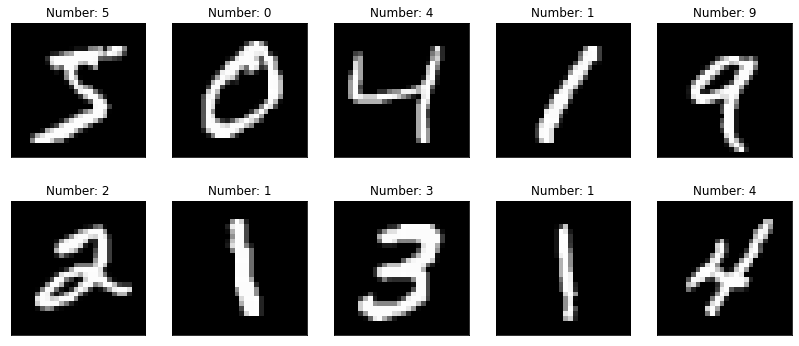

In [36]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_norm[i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

## data splitting(8:2)

In [38]:
## Splitting data into 80% training and 20% test data
#x_train, x_test, y_train, y_test = train_test_split(
#    x_norm, y, test_size=0.2, random_state=1, stratify=y)

In [44]:
x_1, _, y_1, _  = train_test_split( x_norm, y, test_size=0.5, random_state=1, stratify=y)
x_2, _, y_2, _    = train_test_split( x_1, y_1, test_size=0.75, random_state=1, stratify=y_1)
x_train, x_test, y_train, y_test = train_test_split( x_2, y_2, test_size=0.2, random_state=1, stratify=y_2)

In [45]:
print('x_train: ', x_train.shape)
print('x_train: ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train:  (7000, 784)
x_train:  (7000,)
x_test :  (1750, 784)
y_test :  (1750,)


In [46]:
value, count = np.unique(y_train,  return_counts=True)
print(value, count)

[0 1 2 3 4 5 6 7 8 9] [690 788 699 714 683 631 687 730 683 695]


## GRID SEARCH to find the best model and parameters

In [47]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [ 1 ], 'kernel': ['linear']},
  {'C': [ 1, 4, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
]

In [48]:
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1], 'kernel': ['linear']},
                         {'C': [1, 4, 10], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9562857142857142
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.01


## Training

In [59]:
svm2 = SVC(
            gamma = 0.01,
            kernel = 'rbf',
            C = 10,
            decision_function_shape = 'ovr',
            verbose = 1
            )
svm2.fit(x_train, y_train)

[LibSVM]

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

## Predict

In [60]:
y_pred = svm2.predict(x_test)

### Accuracy

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred).round(3))

0.956


### Confusion Matrix

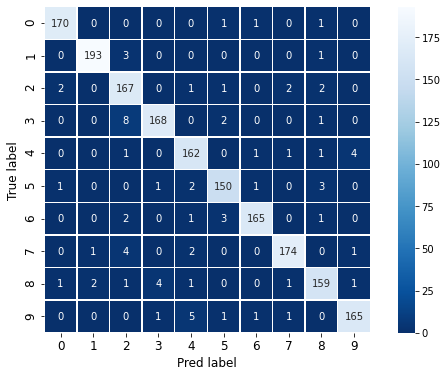

In [62]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [63]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.98      0.98      0.98       197
           2       0.90      0.95      0.93       175
           3       0.97      0.94      0.95       179
           4       0.93      0.95      0.94       170
           5       0.95      0.95      0.95       158
           6       0.98      0.96      0.97       172
           7       0.97      0.96      0.96       182
           8       0.94      0.94      0.94       170
           9       0.96      0.95      0.96       174

    accuracy                           0.96      1750
   macro avg       0.96      0.96      0.96      1750
weighted avg       0.96      0.96      0.96      1750



### Take a view - testing image (a few)

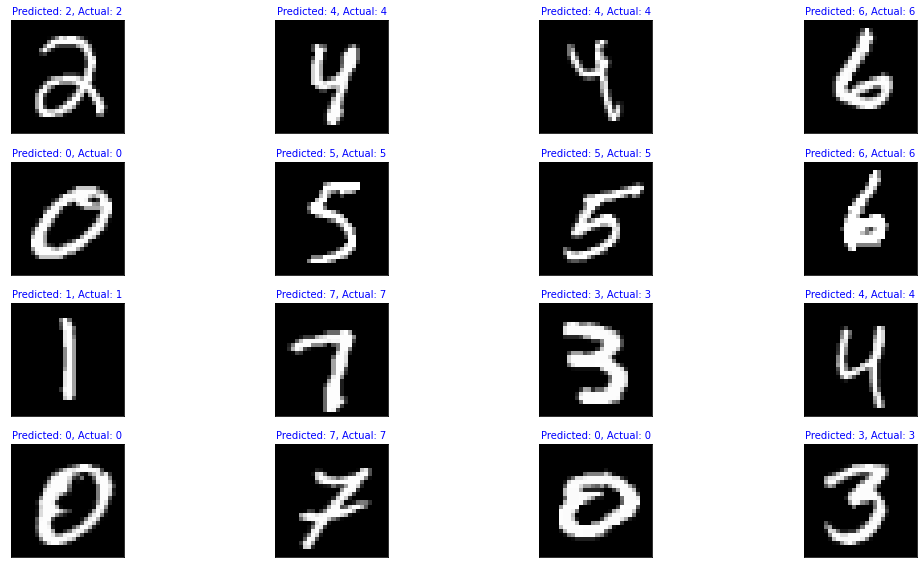

In [64]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 1*num_cols, 1*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (28, 28)), cmap='gray', interpolation=None)

    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

In [66]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

77


[16, 65, 69, 81, 91]

Real:  4
Predict:  4


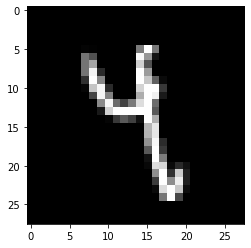

In [67]:
i = 2
plt.imshow(np.reshape( x_test[i], (28, 28)), cmap='gray', interpolation=None)
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

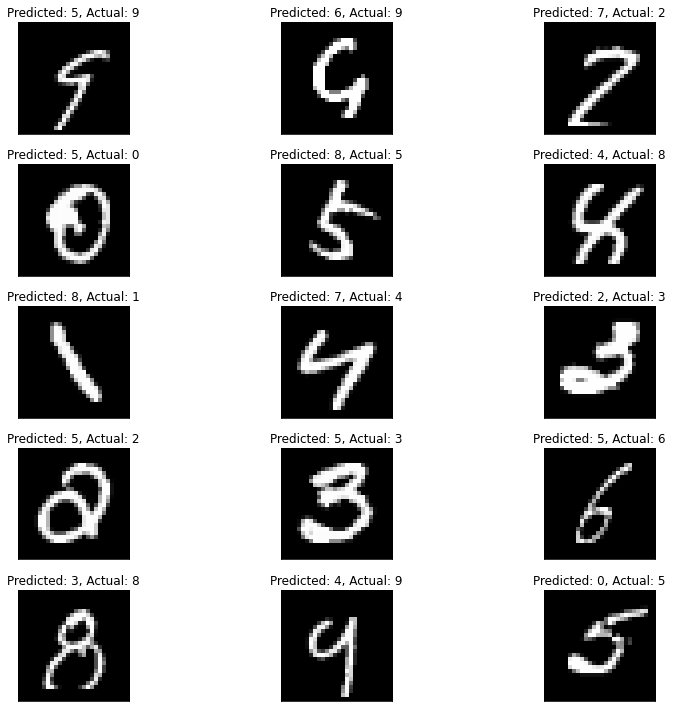

In [68]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 1*num_cols, 1*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (28, 28)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 12)

plt.tight_layout()
plt.show()

## Inference

In [69]:
from google.colab import files
uploaded = files.upload()

Saving testing_image.png to testing_image.png


In [70]:
image_path = './testing_image.png'
image_shape = (28, 28)

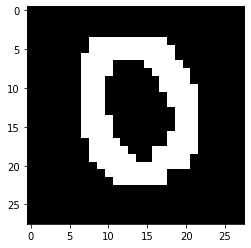

In [71]:
from PIL import Image
image = Image.open(image_path)
image = image.resize(image_shape)
plt.imshow(image, cmap='gray', interpolation=None)
plt.show()

In [72]:
image_np = np.array(image)
image_np = image_np/255
image_np = image_np[:,:,0]

In [73]:
image_np.shape

(28, 28)

In [74]:
img_test = np.reshape(image_np,(1, 784))

In [75]:
img_test.shape

(1, 784)

In [76]:
y_test_img = svm2.predict(img_test)

ML: It is number : 0


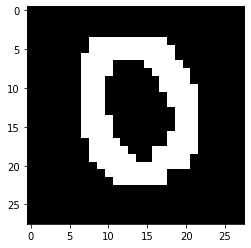

In [77]:
print('ML: It is number :',y_test_img[0])
plt.imshow(image_np, cmap='gray', interpolation=None)
plt.show()